In [1]:
pip install newsapi-python

In [37]:
from newsapi import NewsApiClient
import pandas as pd


class NewsApi:

  def __init__(self):
    # initialize news api
    self.newsapi = NewsApiClient(api_key='a148c40805264d4a9646cd368dd20508')

  def getTopHeadLines(self): # used to get the top head lines for bitcoins
    self.top_headlines = self.newsapi.get_top_headlines(q='bitcoin',
                                          category='business',
                                          language='en',
                                          country='us')

  def getAllArticles(self): # used to get the articles related to bitcoins from sources bbc-news, the verge in range 10/21 to 11/01
    self.all_articles = self.newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2023-10-21',
                                      to='2023-11-01',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

  def getSources(self): # get the data for the latest status regarding the bitcoins from bbc news in range of 10/21 to 11/01
    self.sources = self.newsapi.get_sources()

  def getDatatoDF(self): # converting the requested data into data frame
    self.getTopHeadLines()
    self.getAllArticles()
    self.getSources()

    sources_data = self.sources['sources']
    # Convert the list of dictionaries into a DataFrame
    df_sources = pd.DataFrame(sources_data)

    return df_sources

news_api = NewsApi()
news_df = news_api.getDatatoDF()
news_df.head()

,id,name,description,url,category,language,country
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it


In [38]:
news_df['category'].value_counts()

general          75
business         14
technology       14
sports           13
entertainment     8
science           3
health            1
Name: category, dtype: int64

Here, I have used the NewsAPIClient module to proceed towards the collection of the data. I have used the inbuilt module functionality to collect the data for the daily trending news over the world based analysis. Here, we can see, I have total of 7 different attributes: <br>
Id: Identification number of the news <br>
name: Channel of the news name<br>
description: content of the news thats been broadcasted<br>
url: url link for the data, where we can find the detailed description <br>
category: Type of content thats been broadcasted, such as general, business, technology, sports, entertainment etc. <br>
language: As the news is over the world, it can be of different languages <br>
country: country from where its been broad casted the news.<br>
Some of the questions, I would like to use this, on which topic, most of the channels trending towards broadcasting its news? (which can be find out through the help of entities or topic based analysis) Also which channel is mostly broadcasting the news on daily based analysis.

### PART 4: Data Analysis

In [39]:
import numpy as np

news_df.shape

(128, 7)

In [40]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           128 non-null    object
 1   name         128 non-null    object
 2   description  128 non-null    object
 3   url          128 non-null    object
 4   category     128 non-null    object
 5   language     128 non-null    object
 6   country      128 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


In [42]:
news_df['name'].value_counts()

ABC News           1
ABC News (AU)      1
RT                 1
Reuters            1
Reddit /r/all      1
                  ..
FourFourTwo        1
Fortune            1
Football Italia    1
Focus              1
Ynet               1
Name: name, Length: 128, dtype: int64

In [43]:
news_df['id'].value_counts()

abc-news           1
abc-news-au        1
rt                 1
reuters            1
reddit-r-all       1
                  ..
four-four-two      1
fortune            1
football-italia    1
focus              1
ynet               1
Name: id, Length: 128, dtype: int64

In [44]:
news_df['category'].value_counts()

general          75
business         14
technology       14
sports           13
entertainment     8
science           3
health            1
Name: category, dtype: int64

In [45]:
news_df['category'].value_counts().keys()

Index(['general', 'business', 'technology', 'sports', 'entertainment',
       'science', 'health'],
      dtype='object')

In [46]:
news_df['category'].value_counts().values

array([75, 14, 14, 13,  8,  3,  1])

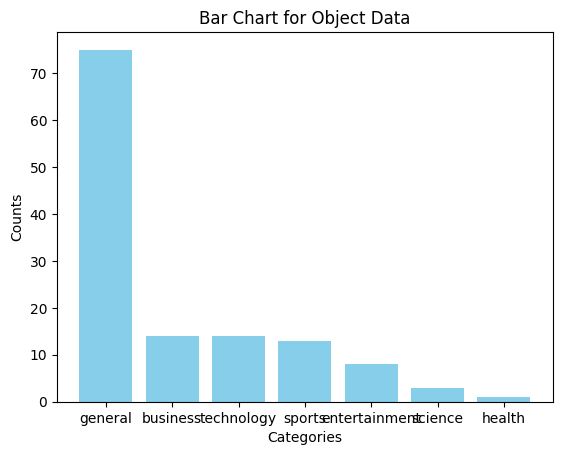

In [48]:
import matplotlib.pyplot as plt

def create_bar_chart_category():
    """
    Create a bar chart for object data.

    Parameters:
    - data: A dictionary where keys represent categories and values represent corresponding counts.

    Example:
    data = {'Category1': 20, 'Category2': 35, 'Category3': 15}
    create_bar_chart(data)
    """
    categories = list(news_df['category'].value_counts().keys())
    values = list(news_df['category'].value_counts().values)

    plt.bar(categories, values, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title('Bar Chart for Object Data')
    plt.show()

create_bar_chart_category()


Here, in the above image, we can see that, mostly general kind of news is been broad casted, than others. Folllowed by business related issues thats been on daily based data, coming towards technology, it also been equal towards the business related activities over the analysis. Coming towards the next category, sports on daily analysis, is not much been broad casted as there are no sports activities on going in current period. At last, we can see the less number of broad cast activity or trending topic is health, which is so less, which means, there are no much health related activity going on, which means, everyone in cities and countries been doing well.

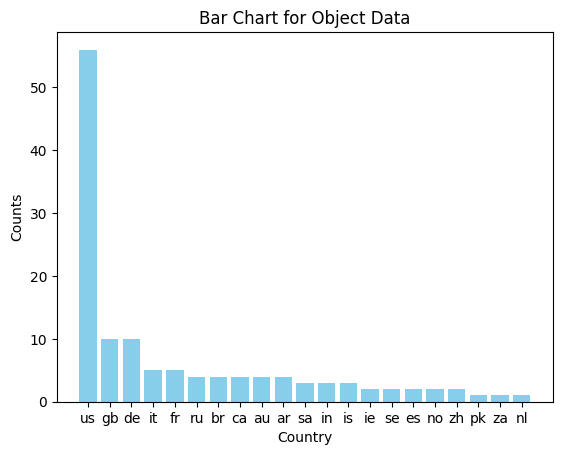

In [49]:
import matplotlib.pyplot as plt

def create_bar_chart_country():
    """
    Create a bar chart for object data.

    Parameters:
    - data: A dictionary where keys represent categories and values represent corresponding counts.

    Example:
    data = {'Category1': 20, 'Category2': 35, 'Category3': 15}
    create_bar_chart(data)
    """
    categories = list(news_df['country'].value_counts().keys())
    values = list(news_df['country'].value_counts().values)

    plt.bar(categories, values, color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Counts')
    plt.title('Bar Chart for Object Data')
    plt.show()

create_bar_chart_country()


From the above data analysis bar chart, we can observe that, most number of broad casts has been done from the usa(united states of america), which is more than 60% per day, which means, most number of activities or trends been done in the usa compared to other countries. Followed by gb, which is united kingdom and de, which is germany has 10% of activities been done. Then followed by it, which is italy and fr for france done by 8% of their activities, and then last we can see that, za(south africa) and nl(netherlands) has been least broadcasted countries, which is over 1% of activity.

In [51]:
news_df.isna().sum() # No missing values

id             0
name           0
description    0
url            0
category       0
language       0
country        0
dtype: int64

In [55]:
tokens = {}
for data in news_df['name'].values:
  vals = data.split()[0]
  # for val in vals:
  if vals in tokens:
    tokens[vals] = tokens[vals]+1
  else:
    tokens[vals] = 1

In [66]:
sorted_data = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True))
top_10_data = dict(list(sorted_data.items())[:10])
top_10_data

{'The': 15,
 'Google': 12,
 'La': 3,
 'ABC': 2,
 'BBC': 2,
 'Business': 2,
 'CNN': 2,
 'ESPN': 2,
 'Fox': 2,
 'MTV': 2}

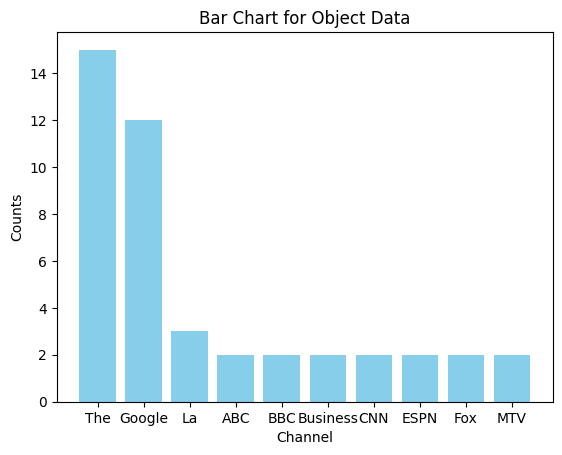

In [67]:
import matplotlib.pyplot as plt

def create_bar_chart_channel():
    """
    Create a bar chart for object data.

    Parameters:
    - data: A dictionary where keys represent categories and values represent corresponding counts.

    Example:
    data = {'Category1': 20, 'Category2': 35, 'Category3': 15}
    create_bar_chart(data)
    """
    categories = list(top_10_data.keys())
    values = list(top_10_data.values())

    plt.bar(categories, values, color='skyblue')
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    plt.title('Bar Chart for Object Data')
    plt.show()

create_bar_chart_channel()


From above bar chart analysis, we can see that, the channels that has been broadcasted more number of news topics, they are The bbbc news channel with above 14% per day channels, followed by google with 12% and then we can see that, La channel that has provided 3% of broadcasting topics over their channels. At last, we can see that, FOX, CNN, ESPN, MTV, with 2% of braodcasting only. Here, these are only top 10% of data that we have provided, there can be more least number of dat news channels possible.

Here, for the code part, first I have separated our text into tokens and then for each token, got the frequency count and then sorted the dict data based on the frequency values in descending order and took only top 10% of the data and plot the bar graph for the data to analyse.